<a href="https://colab.research.google.com/github/witkov/chi-squared/blob/master/chi2_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the section below to import all the necessary python

---

libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
%pylab inline

# this sets the figure format to a vector format
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Populating the interactive namespace from numpy and matplotlib


<ipython-input-1-dfb1f5c682e1>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


Enter your data below

    5 points   chisq min = 17.47    best slope = 137.04 +/- 1.96 


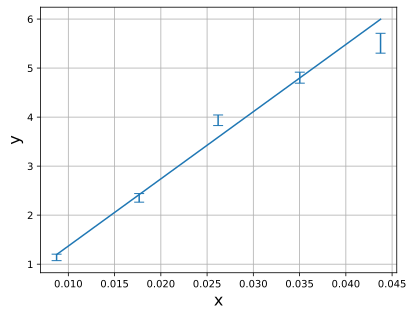

In [2]:
# Measure the mass of each set of filters
m1 = 0.89
m2 = 1.80
m3 = 2.67
m4 = 3.57
m5 = 4.46
m = np.array([m1, m2, m3, m4, m5])*.001
g=9.81

# Measure the terminal velocity for each set of filters 5 times and record the values
v1 = np.array([1.150, 1.026, 1.014, 1.134, 1.010])
v2 = np.array([1.443, 1.492, 1.583, 1.563, 1.589])
v3 = np.array([2.031, 1.939, 1.941, 2.067, 1.941])
v4 = np.array([2.181, 2.202, 2.199, 2.109, 2.269])
v5 = np.array([2.507, 2.292, 2.303, 2.364, 2.267])


################################################################
############## DO NOT EDIT BELOW THIS LINE #####################
################################################################


# Calculate the mean and std dev of each set of 5 velocity measurements.
v = np.array([mean(v1), mean(v2), mean(v3), mean(v4), mean(v5)])
sigma_v=np.array([np.std(v1, ddof=1), np.std(v2, ddof=1), np.std(v3, ddof=1), np.std(v4, ddof=1), np.std(v5, ddof=1)]/np.sqrt(np.size(v1)));

# x,y data arrays and y-error array
x = m*g
y = v**2
yerr = 2*v*sigma_v

# calculate sums needed to obtain chi-square
s_yy=sum((y**2)/(yerr**2));
s_xx=sum((x**2)/(yerr**2));
s_xy=sum((y*x)/(yerr**2));

A_best = s_xy/s_xx
sigma_A = 1/sqrt(s_xx)
minchi2 = s_yy - s_xy**2/s_xx;

# plot data with errorbars
#plt.figure()
plt.figure(facecolor='white')
plt.errorbar(x,y,yerr,linestyle='None',fmt='none',capsize=5)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.plot(x, A_best*x)
#plt.ylim(0,7);


# create parameter range for slope
xmin = A_best-2*sigma_A
xmax = A_best+2*sigma_A
delta_x = xmax-xmin
A = np.linspace(xmin,xmax,200)

# calculate chi-square
chi2 = s_yy + (A**2)*(s_xx) - 2*A*s_xy

# display chi-square vs. slope
#plt.figure()
#plt.plot(A,chi2)
#plt.errorbar(A,chi2)
#plt.xlabel('slope',fontsize=16)
#plt.ylabel('chisq',fontsize=16)
#plt.grid(True)
#plt.title("Chisquared vs Slope and minchi2 + 1 \n %4d points   chisq min =%6.2f    best slope =%7.2f " %(x.size,minchi2,A_best))
#plt.hlines(minchi2+1,xmin,ymin);

print(" %4d points   chisq min =%6.2f    best slope =%7.2f +/- %.2f " %(x.size,minchi2,A_best,sigma_A))